In [1]:
import os
import scipy.io
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#list of files for october 
arr = os.listdir('./traindata_201910')
#list of files for April
arr2 = os.listdir('./traindata_201904')

In [13]:

#looping to include all data in october month

for j in range(len(arr)):
    strain = []
    time = []
    mat = scipy.io.loadmat('./traindata_201910/'+arr[j])
    for item in mat['predat_sg'][0][0][3]:
        strain.append(item)
    for item in mat['predat_sg'][0][0][0]:
        #convert matlab time to date_timestamp before appending 
        time.append(pd.to_datetime(item-719529,unit='d').round('s')[0].date())
    if j==0:
        col_name = []
        for i in range (1,17):
            col_name.append("strain_"+str(i))

        #create datafrome to add the strain values
        strain_oct = pd.DataFrame(strain, columns=col_name)
        strain_oct.insert(0, 'timestamp', time)
        strain_oct = strain_oct.groupby(['timestamp']).mean()
    else:
        temp = pd.DataFrame(strain, columns=col_name)
        temp.insert(0,'timestamp',time)
        temp = temp.groupby(['timestamp']).mean()
        strain_oct = strain_oct.append(temp)


In [49]:
#creating column names
col_name = []
for i in range (1,17):
    col_name.append("strain_"+str(i))

#create datafrome to add the strain values
strain_oct = pd.DataFrame(strain, columns=col_name)
strain_oct.insert(0, 'timestamp', time)


In [ ]:
#convert matlab time to date_time stamp
#dates = strain_oct['mat_time'].apply(lambda matlab_datenum: pd.to_datetime(matlab_datenum-719529,unit='d').round('s'))
#strain_oct.insert(1, 'timestamp', dates)

#group items with same timestamp values and apply mean on the strain values
strain_oct = strain_oct.groupby(['timestamp']).mean().drop(['mat_time'], axis=1)

In [15]:
#save the dataframe to CSV file
strain_oct.to_csv('daywise_oct.csv')

In [19]:
#save the dataframe to .mat file
import scipy.io as sio
destination_folder_path = ''
sio.savemat(os.path.join(destination_folder_path,'daywise_oct.mat'), {name: col.values for name, col in strain_oct.items()})

In [26]:
#looping to include all data in april month

for j in range(len(arr2)):
    strain = []
    time = []
    mat = scipy.io.loadmat('./traindata_201904/'+arr2[j])
    for item in mat['predat_sg'][0][0][3]:
        strain.append(item)
    for item in mat['predat_sg'][0][0][0]:
        #convert matlab time to date_timestamp before appending 
        time.append(pd.to_datetime(item-719529,unit='d').round('s')[0].date())
    if j==0:
        col_name = []
        for i in range (1,17):
            col_name.append("strain_"+str(i))

        #create datafrome to add the strain values
        strain_apr = pd.DataFrame(strain, columns=col_name)
        strain_apr.insert(0, 'timestamp', time)
        strain_apr = strain_apr.groupby(['timestamp']).mean().reset_index()
        strain_apr = strain_apr.groupby(['timestamp']).mean().reset_index()
    else:
        temp = pd.DataFrame(strain, columns=col_name)
        temp.insert(0,'timestamp',time)
        temp = temp.groupby(['timestamp']).mean()
        strain_apr = strain_apr.append(temp)

#save the dataframe to CSV file
strain_apr.to_csv('daywise_apr.csv')

#save the dataframe to .mat file
import scipy.io as sio
destination_folder_path = ''
sio.savemat(os.path.join(destination_folder_path,'daywise_apr.mat'), {name: col.values for name, col in strain_apr.items()})

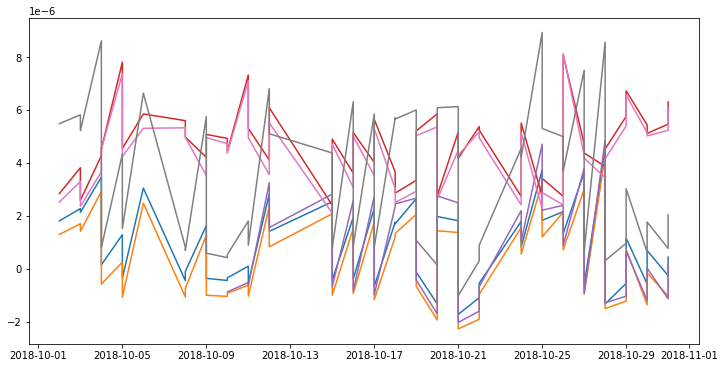

In [28]:
from matplotlib.pyplot import figure

figure(figsize=(12, 6))
plt.plot(strain_oct)


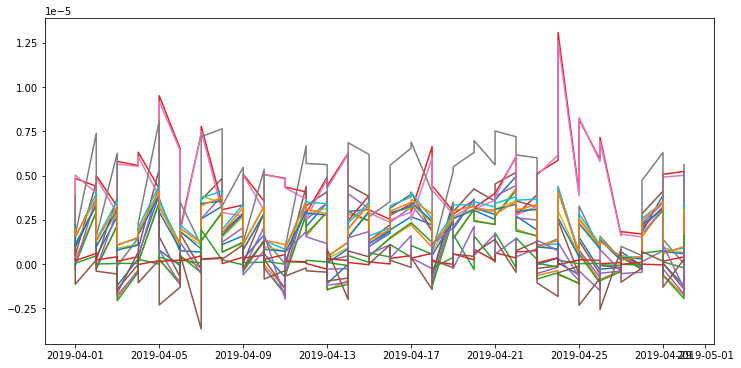

In [27]:
figure(figsize=(12, 6))
plt.plot(strain_apr)


In [33]:
df = pd.read_csv("daywise_oct.csv")

In [ ]:
x = df['timestamp']
y = df['strain_1','strain_2']
plt.scatter(x,y)

In [32]:
#find lag in the strain values (order = 1)
mat = scipy.io.loadmat('./traindata_201810/'+arr[0])

In [41]:
mat['predat_sg'][0][-1][-1][0]

array([-3.39062644e-07, -2.76319165e-07,             nan,  2.19765438e-07,
                   nan,             nan,  5.41557452e-07, -1.06885435e-07,
                   nan,             nan,             nan,             nan,
                   nan,             nan,             nan,             nan])

In [32]:
mat['predat_env']

array([[(array([[737335.67221965]]), array([[array(['tBD31A'], dtype='<U6')],
               [array(['rhBD31A'], dtype='<U7')],
               [array(['tVL'], dtype='<U3')],
               [array(['rhVL'], dtype='<U4')],
               [array(['vpVL'], dtype='<U4')],
               [array(['grVL'], dtype='<U4')],
               [array(['drVL'], dtype='<U4')],
               [array(['dnrVL'], dtype='<U5')],
               [array(['raVL'], dtype='<U4')],
               [array(['wsVL'], dtype='<U4')],
               [array(['wdVL'], dtype='<U4')]], dtype=object), array([[          nan,   71.28002926,   16.71666718,   74.5       ,
                1417.87195067,           nan,           nan,           nan,
                          nan,           nan,           nan]]))                                                                   ]],
      dtype=[('sdn', 'O'), ('labels', 'O'), ('data', 'O')])

In [52]:
#looping to include all data in october month
#LATEST
for j in range(len(arr)):
    strain = []
    time = []
    mat = scipy.io.loadmat('./traindata_201910/'+arr[j])
    for item in mat['predat_sg'][0][0][3]:
        strain.append(item)
    for item in mat['predat_sg'][0][0][0]:
        #convert matlab time to date_timestamp before appending 
        time.append(pd.to_datetime(item-719529,unit='d').round('s')[0].date())
    if j==0:
        col_name = []
        for i in range (1,17):
            col_name.append("strain_"+str(i))
    
        #create datafrome to add the strain values
        strain_oct = pd.DataFrame(strain, columns=col_name)
        strain_oct.insert(0, 'timestamp', time)
        strain_oct = strain_oct.groupby(['timestamp']).mean()
        strain_oct['Surftemp'] = mat['predat_env'][0][0][-1][0][0] #Surface temperature at one point below deck
        strain_oct['Rh'] = mat['predat_env'][0][0][-1][0][1] #Relative humidity at one point below deck
        strain_oct['airtemp'] = mat['predat_env'][0][0][-1][0][2] #Average air temperature
        strain_oct['avgRh'] = mat['predat_env'][0][0][-1][0][3] #Average Relative Humidity
        strain_oct['avgVPr'] = mat['predat_env'][0][0][-1][0][4] #Average Vapour Pressure
        strain_oct['avgGR'] = mat['predat_env'][0][0][-1][0][5] #Average global Radiation
        strain_oct['avgdR']= mat['predat_env'][0][0][-1][0][6] #Average diffuse radiation
        strain_oct['avgdnr'] = mat['predat_env'][0][0][-1][0][7] #Average Direct normal radiation
        strain_oct['totalrain'] = mat['predat_env'][0][0][-1][0][8] #Total Rain
        strain_oct['avgws10'] = mat['predat_env'][0][0][-1][0][9] #wind speed at 10m above ground
        strain_oct['avgwd10'] = mat['predat_env'][0][0][-1][0][10] #wind direction at 10m above ground
    else:
        temp = pd.DataFrame(strain, columns=col_name)
        temp.insert(0,'timestamp',time)
        temp = temp.groupby(['timestamp']).mean()
        temp['Surftemp'] = mat['predat_env'][0][0][-1][0][0] #Surface temperature at one point below deck
        temp['Rh'] = mat['predat_env'][0][0][-1][0][1] #Relative humidity at one point below deck
        temp['airtemp'] = mat['predat_env'][0][0][-1][0][2] #Average air temperature
        temp['avgRh'] = mat['predat_env'][0][0][-1][0][3] #Average Relative Humidity
        temp['avgVPr'] = mat['predat_env'][0][0][-1][0][4] #Average Vapour Pressure
        temp['avgGR'] = mat['predat_env'][0][0][-1][0][5] #Average global Radiation
        temp['avgdR']= mat['predat_env'][0][0][-1][0][6] #Average diffuse radiation
        temp['avgdnr'] = mat['predat_env'][0][0][-1][0][7] #Average Direct normal radiation
        temp['totalrain'] = mat['predat_env'][0][0][-1][0][8] #Total Rain
        temp['avgws10'] = mat['predat_env'][0][0][-1][0][9] #wind speed at 10m above ground
        temp['avgwd10'] = mat['predat_env'][0][0][-1][0][10] #wind direction at 10m above ground
        strain_oct = strain_oct.append(temp)

#save the dataframe to CSV file
strain_oct.to_csv('daywise_oct_with_env2_final.csv')

In [37]:
df1 = pd.read_csv("daywise_oct_with_env.csv")

In [38]:
df1

,timestamp,strain_1,strain_2,strain_3,strain_4,strain_5,strain_6,strain_7,strain_8,strain_9,...,Rh,airtemp,avgRh,avgVPr,avgGR,avgdR,avgdnr,totalrain,avgws10,avgwd10
0,2018-10-02,1.804882e-06,1.291150e-06,NaN,0.000003,NaN,NaN,0.000003,5.482034e-06,NaN,...,71.280029,16.716667,74.500000,1417.871951,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-10-03,2.269802e-06,1.698958e-06,NaN,0.000004,NaN,NaN,0.000003,5.813794e-06,NaN,...,76.997064,12.141666,79.166664,1120.819324,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-10-03,2.128605e-06,1.411400e-06,NaN,0.000003,NaN,NaN,0.000002,5.213818e-06,NaN,...,55.975091,15.683333,61.250000,1091.387360,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-10-04,3.457613e-06,2.919155e-06,NaN,0.000004,NaN,NaN,0.000004,8.611123e-06,NaN,...,79.072215,12.958333,83.083336,1241.060048,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-10-04,1.420150e-07,-5.852899e-07,NaN,0.000005,NaN,NaN,0.000005,7.968894e-07,NaN,...,58.432998,21.924999,54.500000,1433.934434,NaN,NaN,NaN,NaN,NaN,NaN
5,2018-10-05,1.282716e-06,2.430030e-07,NaN,0.000008,NaN,NaN,0.000007,4.326709e-06,NaN,...,77.300284,9.525000,92.833336,1104.173129,NaN,NaN,NaN,NaN,NaN,NaN
6,2018-10-05,-3.599416e-07,-1.080711e-06,NaN,0.000005,NaN,NaN,0.000004,1.512664e-06,NaN,...,47.062426,23.875000,45.583332,1349.343321,NaN,NaN,NaN,NaN,NaN,NaN
7,2018-10-06,3.045380e-06,2.472536e-06,NaN,0.000006,NaN,NaN,0.000005,6.635354e-06,NaN,...,78.543308,11.433333,90.500000,1222.699295,NaN,NaN,NaN,NaN,NaN,NaN
8,2018-10-08,-4.537585e-07,-1.072013e-06,NaN,0.000006,NaN,NaN,0.000005,8.118908e-07,NaN,...,73.230142,5.833333,91.916664,849.545823,NaN,NaN,NaN,NaN,NaN,NaN
9,2018-10-08,-1.061381e-07,-7.471682e-07,NaN,0.000005,NaN,NaN,0.000005,6.869932e-07,NaN,...,52.548953,15.975000,56.000000,1016.622559,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#looping to include all data in april month
#latest
for j in range(len(arr2)):
    strain = []
    time = []
    mat = scipy.io.loadmat('./traindata_201904/'+arr2[j])
    for item in mat['predat_sg'][0][0][3]:
        strain.append(item)
    for item in mat['predat_sg'][0][0][0]:
        #convert matlab time to date_timestamp before appending 
        time.append(pd.to_datetime(item-719529,unit='d').round('s')[0].date())
    if j==0:
        col_name = []
        for i in range (1,17):
            col_name.append("strain_"+str(i))
    
        #create datafrome to add the strain values
        strain_apr = pd.DataFrame(strain, columns=col_name)
        strain_apr.insert(0, 'timestamp', time)
        strain_apr = strain_apr.groupby(['timestamp']).mean()
        strain_apr['Surftemp'] = mat['predat_env'][0][0][-1][0][0] #Surface temperature at one point below deck
        strain_apr['Rh'] = mat['predat_env'][0][0][-1][0][1] #Relative humidity at one point below deck
        strain_apr['airtemp'] = mat['predat_env'][0][0][-1][0][2] #Average air temperature
        strain_apr['avgRh'] = mat['predat_env'][0][0][-1][0][3] #Average Relative Humidity
        strain_apr['avgVPr'] = mat['predat_env'][0][0][-1][0][4] #Average Vapour Pressure
        strain_apr['avgGR'] = mat['predat_env'][0][0][-1][0][5] #Average global Radiation
        strain_apr['avgdR']= mat['predat_env'][0][0][-1][0][6] #Average diffuse radiation
        strain_apr['avgdnr'] = mat['predat_env'][0][0][-1][0][7] #Average Direct normal radiation
        strain_apr['totalrain'] = mat['predat_env'][0][0][-1][0][8] #Total Rain
        strain_apr['avgws10'] = mat['predat_env'][0][0][-1][0][9] #wind speed at 10m above ground
        strain_apr['avgwd10'] = mat['predat_env'][0][0][-1][0][10] #wind direction at 10m above ground
        
    else:
        temp = pd.DataFrame(strain, columns=col_name)
        temp.insert(0,'timestamp',time)
        temp = temp.groupby(['timestamp']).mean()
        temp['Surftemp'] = mat['predat_env'][0][0][-1][0][0] #Surface temperature at one point below deck
        temp['Rh'] = mat['predat_env'][0][0][-1][0][1] #Relative humidity at one point below deck
        temp['airtemp'] = mat['predat_env'][0][0][-1][0][2] #Average air temperature
        temp['avgRh'] = mat['predat_env'][0][0][-1][0][3] #Average Relative Humidity
        temp['avgVPr'] = mat['predat_env'][0][0][-1][0][4] #Average Vapour Pressure
        temp['avgGR'] = mat['predat_env'][0][0][-1][0][5] #Average global Radiation
        temp['avgdR']= mat['predat_env'][0][0][-1][0][6] #Average diffuse radiation
        temp['avgdnr'] = mat['predat_env'][0][0][-1][0][7] #Average Direct normal radiation
        temp['totalrain'] = mat['predat_env'][0][0][-1][0][8] #Total Rain
        temp['avgws10'] = mat['predat_env'][0][0][-1][0][9] #wind speed at 10m above ground
        temp['avgwd10'] = mat['predat_env'][0][0][-1][0][10] #wind direction at 10m above ground
        strain_apr = strain_apr.append(temp)

#save the dataframe to CSV file
strain_apr.to_csv('daywise_apr_with_env.csv')

In [ ]:
#run multivariate VAR


import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split

#read the data
df = pd.read_csv("AirQualityUCI.csv", parse_dates=[['Date', 'Time']])

#check the dtypes
df.dtypes

#missing value treatment
cols = data.columns
for j in cols:
    for i in range(0,len(data)):
        if data[j][i] == -200:
            data[j][i] = data[j][i-1]

#checking stationarity
from statsmodels.tsa.vector_ar.vecm import coint_johansen
#since the test works for only 12 variables, I have randomly dropped
#in the next iteration, I would drop another and check the eigenvalues
johan_test_temp = data.drop([ 'CO(GT)'], axis=1)
coint_johansen(johan_test_temp,-1,1).eig

#creating the train and validation set
train = data[:int(0.8*(len(data)))]
valid = data[int(0.8*(len(data))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,13):
    for i in range(0, len(prediction)):
        pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

#make final predictions
model = VAR(endog=data)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)

In [3]:
df1 = pd.read_csv("daywise_apr.csv")
df2 = pd.read_csv("daywise_oct.csv")

In [24]:
df3 = df2.append(df1, ignore_index=True)

In [22]:
df3

,timestamp,strain_1,strain_2,strain_3,strain_4,strain_5,strain_6,strain_7,strain_8,strain_9,strain_10,strain_11,strain_12,strain_13,strain_14,strain_15,strain_16
0,2018-10-02,1.804882e-06,1.291150e-06,NaN,0.000003,NaN,NaN,0.000003,5.482034e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-10-03,2.269802e-06,1.698958e-06,NaN,0.000004,NaN,NaN,0.000003,5.813794e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-10-03,2.128605e-06,1.411400e-06,NaN,0.000003,NaN,NaN,0.000002,5.213818e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-10-04,3.457613e-06,2.919155e-06,NaN,0.000004,NaN,NaN,0.000004,8.611123e-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-10-04,1.420150e-07,-5.852899e-07,NaN,0.000005,NaN,NaN,0.000005,7.968894e-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2019-04-26,-3.124659e-07,-9.232934e-07,-1.002870e-06,0.000007,-6.356581e-07,-3.183168e-07,0.000006,1.193259e-06,1.174737e-06,1.245790e-06,1.115366e-06,1.164278e-06,3.411089e-09,1.196962e-07,-3.273108e-07,-1.667888e-06
76,2019-04-27,2.549993e-07,7.168742e-08,-8.060298e-09,0.000002,5.027693e-08,1.492946e-07,0.000002,6.433991e-07,3.332187e-07,3.612386e-07,2.934336e-07,3.209738e-07,-3.559686e-08,3.452330e-08,-4.634966e-07,-9.167307e-08
77,2019-04-28,8.590041e-07,6.393356e-07,7.047048e-07,0.000002,1.048512e-06,1.398638e-06,0.000002,2.602460e-06,1.278090e-06,1.505590e-06,1.261098e-06,1.437868e-06,2.817936e-07,6.031811e-08,-1.552841e-07,2.520299e-07
78,2019-04-29,1.962889e-06,1.290465e-06,1.197580e-06,0.000004,1.593252e-06,2.089498e-06,0.000004,3.852848e-06,2.024704e-06,2.109126e-06,1.913340e-06,2.073502e-06,4.534765e-07,6.241088e-08,9.231739e-07,-5.676041e-07


In [19]:
df1 = df1.groupby(['timestamp']).mean().reset_index()

In [23]:
df2 = df2.groupby(['timestamp']).mean().reset_index()

In [26]:
df5 = pd.read_csv('daywise_oct_with_env.csv')

In [57]:
strain_apr.to_csv('daywise_apr_with_env.csv')


In [2]:
dfa = pd.read_csv("daywise_apr_with_env.csv")
dfo = pd.read_csv("daywise_oct_with_env2_final.csv")

In [3]:
dfa = dfa.groupby('timestamp').mean()
dfa['retrofit'] = 0
dfo = dfo.groupby('timestamp').mean()
dfo['retrofit'] = 1

In [4]:
dfall = dfa.append(dfo)

In [5]:
#dfall = dfall.reset_index()

In [6]:
dfall = dfall.drop(["strain_4","strain_6","strain_7","strain_9","strain_10","strain_11","strain_12","strain_13","strain_14","strain_15","strain_16"], axis=1)

In [7]:
dfall

,strain_1,strain_2,strain_3,strain_5,strain_8,Surftemp,Rh,airtemp,avgRh,avgVPr,avgGR,avgdR,avgdnr,totalrain,avgws10,avgwd10,retrofit
timestamp,,,,,,,,,,,,,,,,,
2019-04-01,1.391124e-06,9.055422e-07,7.714158e-07,9.654413e-07,2.746018e-06,11.802222,51.495514,11.349167,56.125002,708.982498,233.389167,87.455833,478.697500,0.00,3.335575,37.478949,0
2019-04-02,1.902302e-06,1.393590e-06,1.346971e-06,1.786195e-06,4.467735e-06,11.776378,72.111068,10.497500,77.708336,985.274874,87.955000,83.221667,2.445000,0.05,1.135126,209.014923,0
2019-04-03,7.411497e-07,1.109817e-07,7.233085e-08,6.347549e-07,3.083803e-06,8.487706,69.587566,8.279167,72.916666,790.862084,116.270833,107.811667,21.199167,0.00,1.599006,141.619137,0
2019-04-04,4.070716e-07,-9.959862e-08,-1.797842e-07,-1.076326e-08,1.905123e-06,7.694840,71.085618,7.617500,72.458332,738.126551,160.467500,128.485000,112.169167,0.00,1.181543,178.318237,0
2019-04-05,2.359754e-06,1.851080e-06,1.895205e-06,2.641687e-06,5.894953e-06,9.097269,66.807711,9.810000,71.999998,846.904428,225.915833,94.376667,376.993333,0.00,2.706478,30.143506,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-27,-5.999584e-07,-6.906911e-07,-6.094068e-07,-4.732139e-07,1.166937e-07,11.353086,74.968842,8.625833,86.211667,963.436168,50.277500,45.353333,0.026667,0.00,0.675000,212.700000,1
2019-10-28,1.397000e-06,9.859024e-07,1.066181e-06,2.024451e-06,5.393001e-06,9.467404,80.369227,6.798333,90.648333,895.893447,95.483333,30.701667,225.355000,0.00,0.570000,185.550000,1
2019-10-29,-6.309372e-07,-1.042560e-06,-1.056013e-06,-6.259414e-07,1.546657e-06,9.921486,76.104669,8.613333,74.891667,833.864494,61.040000,42.480833,51.544167,0.00,1.270000,36.745000,1


In [8]:
df_1 = dfall.drop(['strain_2','strain_3','strain_5','strain_8'],axis=1).rename(columns={"strain_1": "strain"})
df_2 = dfall.drop(['strain_1','strain_3','strain_5','strain_8'],axis=1).rename(columns={"strain_2": "strain"})
df_3 = dfall.drop(['strain_1','strain_2','strain_5','strain_8'],axis=1).rename(columns={"strain_3": "strain"})
df_5 = dfall.drop(['strain_1','strain_2','strain_3','strain_8'],axis=1).rename(columns={"strain_5": "strain"})
df_8 = dfall.drop(['strain_1','strain_2','strain_3','strain_5'],axis=1).rename(columns={"strain_8": "strain"})

In [9]:
df_1["lx (m)"] = 34.140625
df_2["lx (m)"] = 48.515625
df_3["lx (m)"] = 59.296875
df_5["lx (m)"] = 80.859375
df_8["lx (m)"] = 95.234375

In [10]:
df_comp = df_1.append(df_2)
df_comp  = df_comp.append(df_3)
df_comp  = df_comp.append(df_5)
df_comp  = df_comp.append(df_8)

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df_1['timestamp'], df_1['strain'], marker='o', linestyle='--', color='r', label='Strain_1') 
plt.plot(df_2['timestamp'], df_2['strain'], marker='o', linestyle='--', color='orange', label='Strain_2') 
plt.plot(df_3['timestamp'], df_3['strain'], marker='o', linestyle='--', color='k', label='Strain_3') 
plt.plot(df_5['timestamp'], df_5['strain'], marker='o', linestyle='--', color='y', label='Strain_5') 
plt.plot(df_8['timestamp'], df_8['strain'], marker='o', linestyle='--', color='g', label='Strain_8') 
plt.xticks(rotation=90)
plt.xlabel('Time Stamp')
plt.ylabel('Strain Value')
plt.legend()

In [170]:
df_comp

,timestamp,strain,Surftemp,Rh,airtemp,avgRh,avgVPr,avgGR,avgdR,avgdnr,totalrain,avgws10,avgwd10,retrofit,lx (m)
0,2019-04-01,1.391124e-06,11.802222,51.495514,11.349167,56.125002,708.982498,233.389167,87.455833,478.697500,0.00,3.335575,37.478949,0,34.140625
1,2019-04-02,1.902302e-06,11.776378,72.111068,10.497500,77.708336,985.274874,87.955000,83.221667,2.445000,0.05,1.135126,209.014923,0,34.140625
2,2019-04-03,7.411497e-07,8.487706,69.587566,8.279167,72.916666,790.862084,116.270833,107.811667,21.199167,0.00,1.599006,141.619137,0,34.140625
3,2019-04-04,4.070716e-07,7.694840,71.085618,7.617500,72.458332,738.126551,160.467500,128.485000,112.169167,0.00,1.181543,178.318237,0,34.140625
4,2019-04-05,2.359754e-06,9.097269,66.807711,9.810000,71.999998,846.904428,225.915833,94.376667,376.993333,0.00,2.706478,30.143506,0,34.140625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2019-10-27,1.166937e-07,11.353086,74.968842,8.625833,86.211667,963.436168,50.277500,45.353333,0.026667,0.00,0.675000,212.700000,1,95.234375
57,2019-10-28,5.393001e-06,9.467404,80.369227,6.798333,90.648333,895.893447,95.483333,30.701667,225.355000,0.00,0.570000,185.550000,1,95.234375
58,2019-10-29,1.546657e-06,9.921486,76.104669,8.613333,74.891667,833.864494,61.040000,42.480833,51.544167,0.00,1.270000,36.745000,1,95.234375
59,2019-10-30,4.421555e-06,7.566899,77.632557,6.325000,78.035833,745.242319,32.364167,29.780833,0.000000,0.00,2.005000,44.650000,1,95.234375


In [13]:
#run linear regression

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

#dealing with missing values
X = df_comp.drop('strain', axis=1)
y = df_comp['strain']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [182]:
lr.coef_

array([-7.32918585e-07, -2.31772820e-07,  1.07521188e-06,  2.83471035e-07,
       -4.83768362e-09,  1.14031235e-08, -2.04704203e-08, -6.49621047e-09,
       -1.70444583e-06,  8.94803691e-08, -3.00796022e-09, -5.62001361e-07,
        3.14184517e-08])

In [183]:
lr.intercept_

-2.3164128924815833e-06

In [184]:
lr.score(X_test, y_test)

0.3924089764234414

In [185]:
X.corr()

,Surftemp,Rh,airtemp,avgRh,avgVPr,avgGR,avgdR,avgdnr,totalrain,avgws10,avgwd10,retrofit,lx (m)
Surftemp,1.000000e+00,-2.152850e-01,9.747528e-01,-2.983697e-01,5.684068e-01,9.519627e-02,-8.447963e-02,1.256301e-01,4.533550e-02,1.839667e-01,-4.586977e-02,7.498677e-02,1.677069e-16
Rh,-2.152850e-01,1.000000e+00,-2.480698e-01,9.723831e-01,6.446555e-01,-8.661916e-01,-5.956108e-01,-8.056235e-01,2.042600e-01,-5.197775e-01,4.503028e-01,7.288194e-01,7.335662e-16
airtemp,9.747528e-01,-2.480698e-01,1.000000e+00,-3.616480e-01,5.406419e-01,1.694691e-01,-3.510775e-02,1.952337e-01,4.971249e-03,2.731617e-01,-6.243032e-02,2.017131e-03,-6.014388e-16
avgRh,-2.983697e-01,9.723831e-01,-3.616480e-01,1.000000e+00,5.608952e-01,-8.401467e-01,-5.541348e-01,-7.924454e-01,2.558436e-01,-5.950151e-01,4.794773e-01,6.712207e-01,6.911524e-16
avgVPr,5.684068e-01,6.446555e-01,5.406419e-01,5.608952e-01,1.000000e+00,-6.132273e-01,-5.177388e-01,-5.510338e-01,2.094811e-01,-2.036595e-01,3.509903e-01,6.112809e-01,-2.054537e-16
avgGR,9.519627e-02,-8.661916e-01,1.694691e-01,-8.401467e-01,-6.132273e-01,1.000000e+00,7.293697e-01,9.061787e-01,-1.775341e-01,4.630690e-01,-2.412233e-01,-7.829176e-01,4.095492e-16
avgdR,-8.447963e-02,-5.956108e-01,-3.510775e-02,-5.541348e-01,-5.177388e-01,7.293697e-01,1.000000e+00,3.899672e-01,-1.374128e-01,2.765396e-01,-2.703759e-02,-7.715444e-01,-7.025112e-16
avgdnr,1.256301e-01,-8.056235e-01,1.952337e-01,-7.924454e-01,-5.510338e-01,9.061787e-01,3.899672e-01,1.000000e+00,-1.841247e-01,4.780176e-01,-3.274065e-01,-5.869362e-01,4.600683e-17
totalrain,4.533550e-02,2.042600e-01,4.971249e-03,2.558436e-01,2.094811e-01,-1.775341e-01,-1.374128e-01,-1.841247e-01,1.000000e+00,-1.593518e-01,1.882248e-01,-5.927637e-02,9.468082e-17
avgws10,1.839667e-01,-5.197775e-01,2.731617e-01,-5.950151e-01,-2.036595e-01,4.630690e-01,2.765396e-01,4.780176e-01,-1.593518e-01,1.000000e+00,-2.644061e-01,-2.872552e-01,-1.120402e-15


<AxesSubplot:>

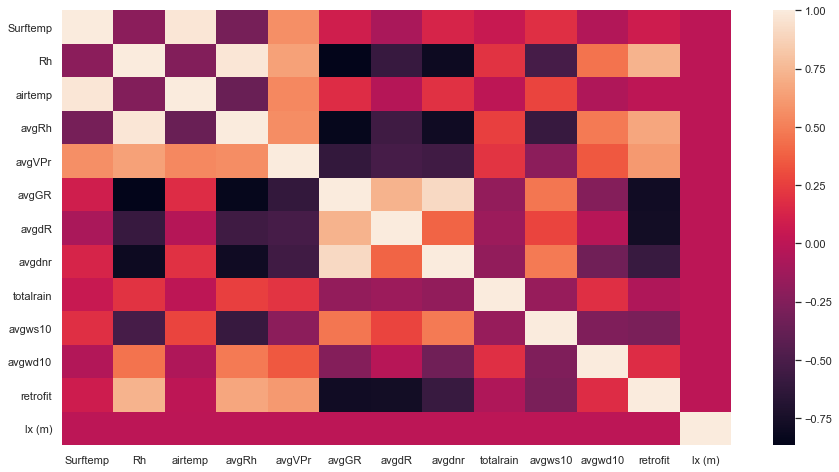

In [138]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(X.corr())


In [14]:
#Linear Regression with correlated variables

# Air_temp and Surf_temp
# AvgRh and Rh
# Avgdnr and avgGR

df_new = df_comp.copy()
df_new['airtemp*Surftemp'] = df_new['airtemp']*df_new['Surftemp']
df_new['avgRh*Rh'] = df_new['avgRh']*df_new['Rh']
df_new['avgdnr*avgGR'] = df_new['avgdnr']*df_new['avgGR']
X1 = df_new.drop('strain', axis=1)
y1 = df_new['strain']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)
lr1 = LinearRegression()
lr1.fit(X1_train, y1_train)
lr1.coef_

array([-1.00330316e-06, -2.34493720e-07,  7.09387255e-07,  2.98206738e-07,
       -5.44373350e-09,  9.78316711e-09, -1.85111235e-08, -6.81229930e-09,
       -2.07917277e-06,  2.79915760e-07, -2.56745536e-09, -9.96398106e-07,
        3.11206047e-08,  2.65314746e-08,  2.52690794e-10,  2.48370481e-12])

In [15]:
lr1.intercept_

-6.767178628037426e-07

In [17]:
lr1.score(X1_test,y1_test)

0.4217589069954959

In [18]:
#final Linear Regression

df_final = df_comp.copy()
df_final['airtemp*Surftemp'] = df_final['airtemp']*df_final['Surftemp'] 
X2 = df_final.drop('strain', axis=1)
y2 = df_final['strain']
lr2 = LinearRegression()
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
lr2.fit(X2_train,y2_train)
lr2.coef_

array([-1.02847347e-06, -2.16258266e-07,  7.39409173e-07,  3.24857545e-07,
       -6.07804384e-09,  1.19045085e-08, -2.12715103e-08, -6.86964903e-09,
       -2.07847876e-06,  2.89672063e-07, -2.49922913e-09, -1.01819999e-06,
        3.09133416e-08,  2.80110267e-08])

In [19]:
lr2.intercept_

-2.1807076893661185e-06

In [20]:
lr2.score(X2_test, y2_test)

0.42059142260398696